# Playing with kernels in GPs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import GPy

### Setting up the problem, and training data

Simple 1D example, where the truth is a sinusoidal function, and we'll have a few training points. 

In [2]:
# define truth underlying function we are trying to model
def true_function(x):
    return np.sin(x)

In [3]:
# define test data (_s stands for \star)
x_min=-2
x_max=x_min+4
n_s = 81
x_s = np.linspace(x_min,x_max,n_s).reshape(-1,1)

In [4]:
# reset random number generator
np.random.seed(10)

In [5]:
# training data (_t stands for training)
x_t = [x_min+0.4,x_min+0.5,x_min+0.6,x_min+1,x_min+2.5,x_min+3]
n_t = len(x_t)
x_t = np.array(x_t).reshape(n_t,1)
# noise variance
noise_var=1.e-2
noise_rms=np.sqrt(noise_var)
y_t = true_function(x_t) + noise_rms*np.random.normal(size=[n_t,1])

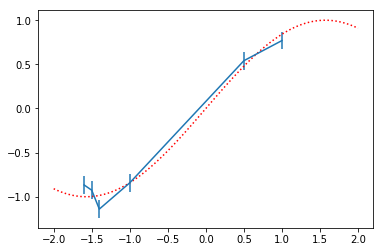

In [6]:
plt.errorbar(x_t,y_t,yerr=noise_rms*np.ones(n_t))
plt.plot(x_s,true_function(x_s),':',color='red')
plt.show()

### Squared-Exponential kernel (or RBF)

In [7]:
# setup RBF kernel
k_RBF = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=0.2)

In [8]:
# setup main GP model
m_RBF = GPy.models.GPRegression(x_t,y_t,k_RBF,noise_var=noise_var)
print('log marginal likelihood',m_RBF.log_likelihood())

log marginal likelihood -5.325513616483572


In [9]:
display(m_RBF)

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,0.2,+ve,
Gaussian_noise.variance,0.01,+ve,


 /Users/font/Programs/Others/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


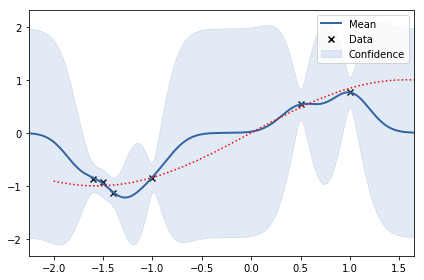

In [10]:
fig = m_RBF.plot()
plt.plot(x_s,true_function(x_s),':',color='red')
plt.show()

In [11]:
m_RBF.optimize(messages=True)

 /Users/font/Programs/Others/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


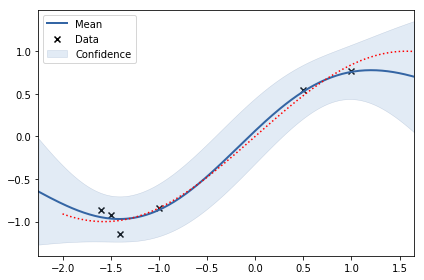

In [12]:
fig = m_RBF.plot()
plt.plot(x_s,true_function(x_s),':',color='red')
plt.show()

This worked quite well. Depending on the random seed, some of the hyper-parameters are not properly fitted (the noise variance, for instance, should not move from its true value), but this is expected. If we have fewer points, it is even harder to fit them. Let's try now with a linear kernel!

### Dot kernel (or linear)

$K(x_1,x_2) = \sigma_L^2 x_1 x_2$

This kernel is useful in linear model, i.e., it could be useful when doing first-order Taylor expansions around a fiducial model.

In [13]:
k_lin = GPy.kern.Linear(input_dim=1,variances=1.0,ARD=False)

In [14]:
# setup main GP object
m_lin = GPy.models.GPRegression(x_t,y_t,k_lin,noise_var=noise_var)
print('log marginal likelihood',m_lin.log_likelihood())

log marginal likelihood -3.673842922882094


In [15]:
display(m_lin)

GP_regression.,value,constraints,priors
linear.variances,1.0,+ve,
Gaussian_noise.variance,0.01,+ve,


 /Users/font/Programs/Others/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


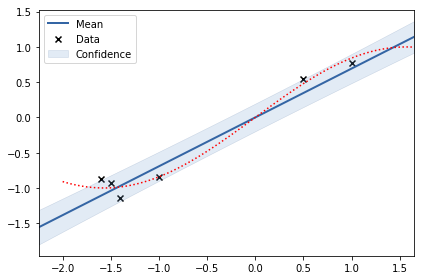

In [16]:
fig = m_lin.plot()
plt.plot(x_s,true_function(x_s),':',color='red')
plt.show()

In [17]:
m_lin.optimize(messages=True)

 /Users/font/Programs/Others/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


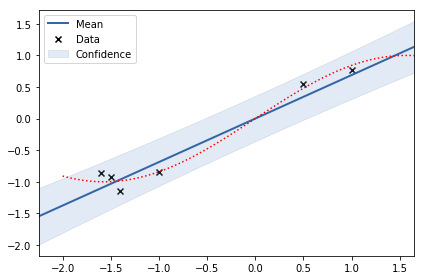

In [18]:
fig = m_lin.plot()
plt.plot(x_s,true_function(x_s),':',color='red')
plt.show()

This is not too bad, probably because the truth is not too far from linear (sin x ~ x) on the scales tested. However, if you re-run the notebook with x_min=0, the GP with linear kernel fails completely. This is a situation similar to the one in our P1D problem, since our parameters are defined in the range [0,1] and the fiducial model that we should be Taylor-expanding around is somewhere near x=0.5.